# Stack Overflow 2020 Survey analysis
## 1. Introduction

### 1.1. Business understanding

#### 1.1.1. About Stack Overflow
Basically everybody that does some kind of programming and uses google might have bumped into this page at least once. It is focused in more specific, less generalistic questions [1] , hence a tool to quickly solve issues and doubts when programming.

It has over 15 million users, with an average of 6.2k answers per day, with a total of 32 million answers over 21 million questions, as of June, 2021 [2].

#### 1.1.2. About the Survey

Since 2011, Stack Overflow has been conducting yearly surveys to evaluate career, experience, tools used, and personal information such as age, gender, ethnicity [3] [4]. There are about 65 thousand developers that responded this survey in 2020. Not all answers were mandatory, including salary, and some survey responses were discarded because respondents spent less than 3 minutes on the survey.


#### 1.1.3 Goals
With the data available, I wish to understand and analyze the following questions:

- A: "Do employees of smaller companies earn overall less than those working for bigger companies?"
- B: "Job satisfaction equals bigger salary?"
- C: "What is the influence Job satisfaction and Job seeking factors into Job seeking status?"

#### References of this section
[1]: https://stackoverflow.com/help/how-to-ask. Retrieved June, 27th 2021.
<br>[2]: https://stackexchange.com/sites?view=list#questions. Retrieved June, 27th 2021.
<br>[3]: https://insights.stackoverflow.com/survey/2020. Retrieved June, 27th 2021.
<br>[4]: https://insights.stackoverflow.com/survey/. Retrieved June, 27th 2021.


### 1.2. Data Understanding

Survey data is a csv file. There is also another csv file with a data schema, explaining what each column means, and a pdf copy of the survey site. Let's take a look at the dictionary first.

In [1]:
# importing fundamental libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1.2.1. Loading data schema through a CSV file.


In [2]:
data_schema = pd.read_csv('.gitignore\\survey_results_schema.csv')

In [3]:
# run this if you want to see each one of the columns and its respective explanations

data_schema.head(10)

#data_schema.iloc[7,:]

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


### 1.2.2. Loading survey data through a CSV file.

In [4]:
data = pd.read_csv('.gitignore\\survey_results_public.csv')

In [5]:
data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


Checking the rate of null values. As we can see below, there is plenty of null.


In [6]:
(data.isna().sum()/data.shape[0]).head(10).to_frame().style.bar()

,0
Respondent,0.000000
MainBranch,0.004638
Hobbyist,0.000698
Age,0.294985
Age1stCode,0.101782
CompFreq,0.378399
CompTotal,0.459735
ConvertedComp,0.460821
Country,0.006035
CurrencyDesc,0.294581


# 2. Question A: "Do employees of smaller companies earn overall less than those working for bigger companies?"

## 2.1. Selecting Variables

Here we will select the variables related to the question: ConvertedComp and OrgSize, as they are directly related to the question. I will also select the Country variable, as I suspect the converted compensation is heavily influenced by the Country, since it is just a convertion by exchange rate. If the salary was converted to a more diverse, relative metric, like purchasing power for exemple, we might see a more indirect effect of Country.

As we can see below, the ConvertedComp and OrgSize have a high number of null values. However, there is still more than half of the dataset that have those two variables filled with valid entries.

In [32]:
(data[['ConvertedComp','Country','OrgSize']].isna().sum()/data.shape[0]).to_frame().style.bar()

,0
ConvertedComp,0.460821
Country,0.006035
OrgSize,0.312235


If we remove all rows that have null values in any of these three variables, we still keep ~ 46.9% of data

In [33]:


remaining_data = 100*(data.shape[0] - data[['ConvertedComp','Country','OrgSize']].dropna().shape[0])/data.shape[0]
print('The percentage of non missing values in these 3 columns is {:.1f} percent.'.format(remaining_data))

The percentage of non missing values in these 3 columns is 46.9 percent.


This means 34215 rows. Therefore, I opt to drop null rows.

In [17]:
q2 = data[['ConvertedComp','Country','OrgSize']].dropna()
print('The total number of remaining rows is {:.0f}.'.format(q2.shape[0]))

The total number of remaining rows is 34215.


## 2.2. Plotting Salary x Organization Size

Text(0.5, 1.0, 'Organization Size x Compensation in USD')

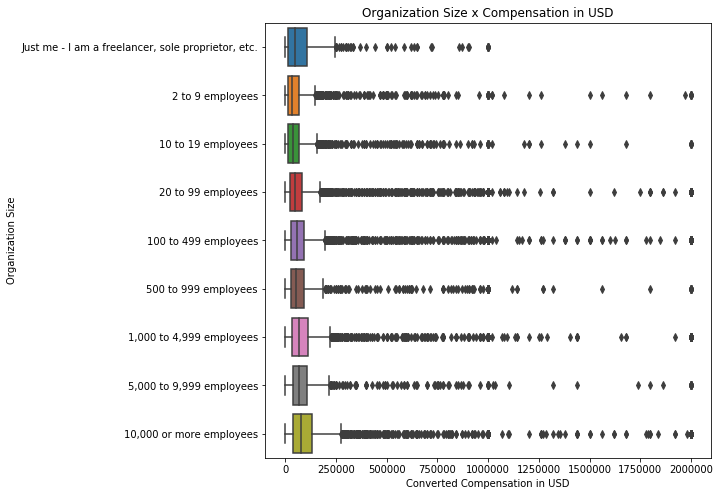

In [21]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="ConvertedComp", y="OrgSize", order=[
    'Just me - I am a freelancer, sole proprietor, etc.','2 to 9 employees','10 to 19 employees',
    '20 to 99 employees','100 to 499 employees','500 to 999 employees','1,000 to 4,999 employees',
    '5,000 to 9,999 employees','10,000 or more employees'], data=q2)
plt.ylabel('Organization Size')
plt.xlabel('Converted Compensation in USD')
plt.title('Organization Size x Compensation in USD')

This result is quite interesting. We can see that the median of each category increases from the 2-9 employees to 10,000 ++ employees category, and the box becomes bigger. Since the box is formed by the first quartile and the last quartile, it is a good indicator that the spread increases with organization size as well.
However, the freelancer/sole proprietor is different. The box is bigger and although the first quartile is a low value, like that of small companies, the third quartile is larger. 
The outliers, or instances outside of the 1.5 Interquartile range, are less frequent in the freelancer/sole proprietor category, unlike in the big, 10,000++ organization.

It is important to account for differences in Country compensation and participation in the survey.
Let's understand what are the top countries and their mean compensations.

In [41]:
country_frequency = ((q2['Country'].value_counts()[:10])/q2.shape[0]).to_frame(name='relative_frequency')


In [42]:
country_frequency['ConvertedCompMean'] = q2.groupby('Country').mean().loc[country_frequency.index.tolist()]

Text(0, 0.5, 'Relative Frequency')

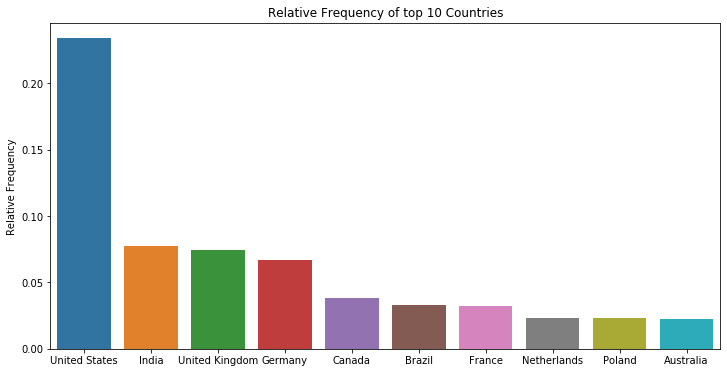

In [43]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=country_frequency.index, y="relative_frequency", data=country_frequency)
plt.title('Relative Frequency of top 10 Countries')
plt.ylabel('Relative Frequency')

Now, for compensation mean per Country


Text(0, 0.5, 'Converted Compensation Mean in USD')

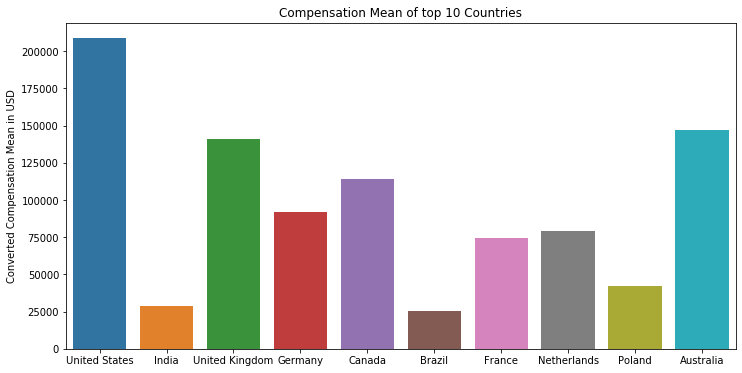

In [44]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=country_frequency.index, y="ConvertedCompMean", data=country_frequency)
plt.title('Compensation Mean of top 10 Countries')
plt.ylabel('Converted Compensation Mean in USD')

Now, let's do a boxplot like the previous one, but for some of the top countries.

Text(0.5, 1.0, 'Brazil - Organization Size x Compensation in USD')

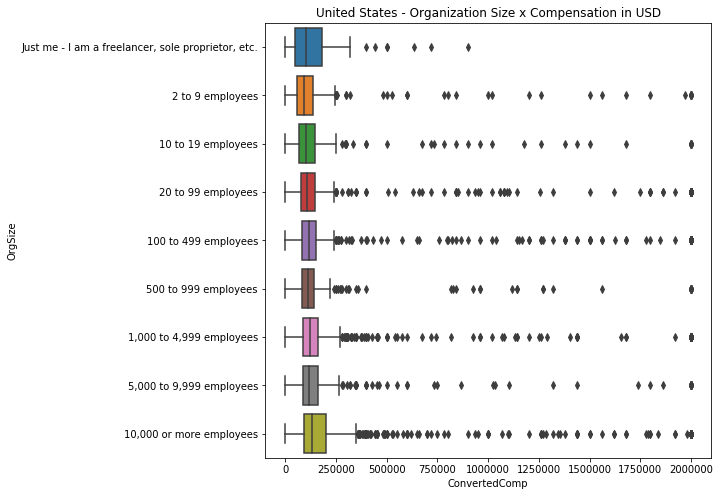

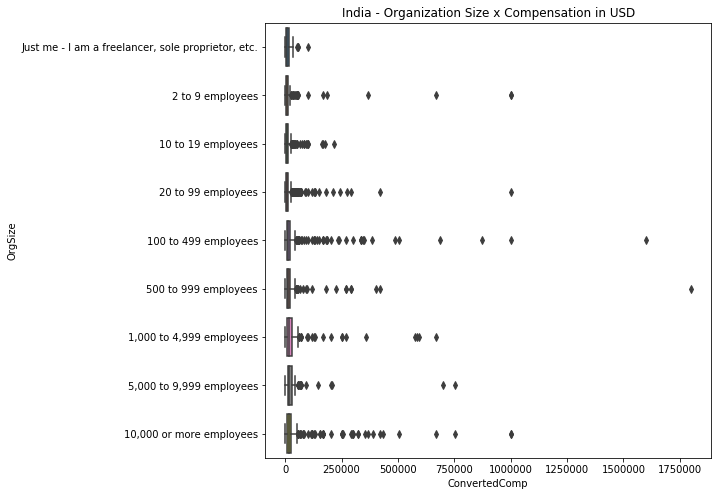

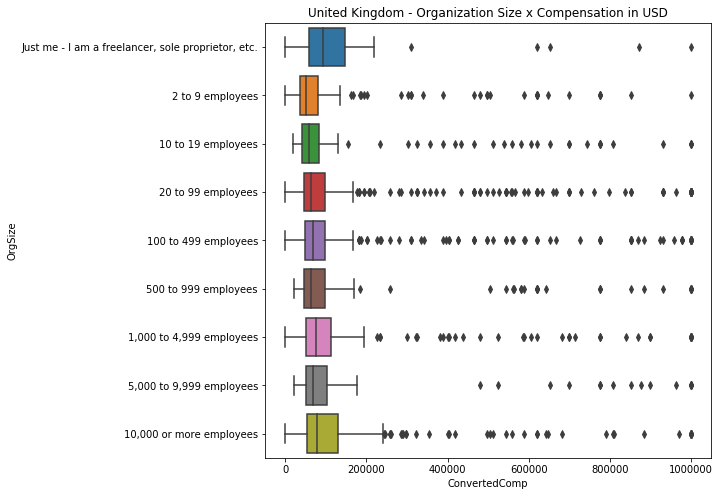

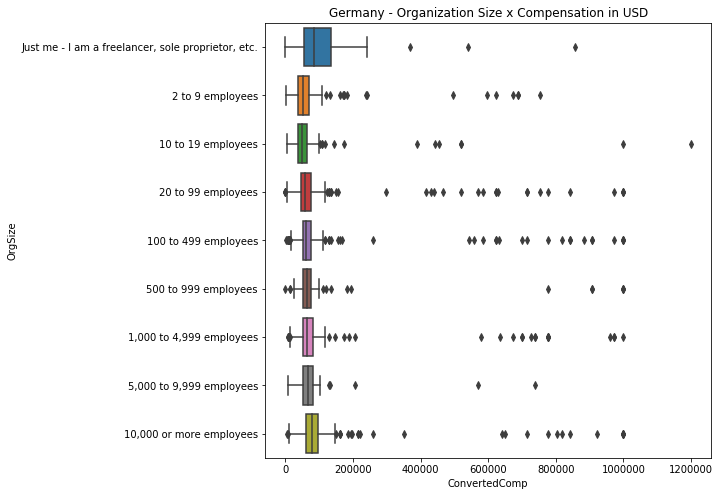

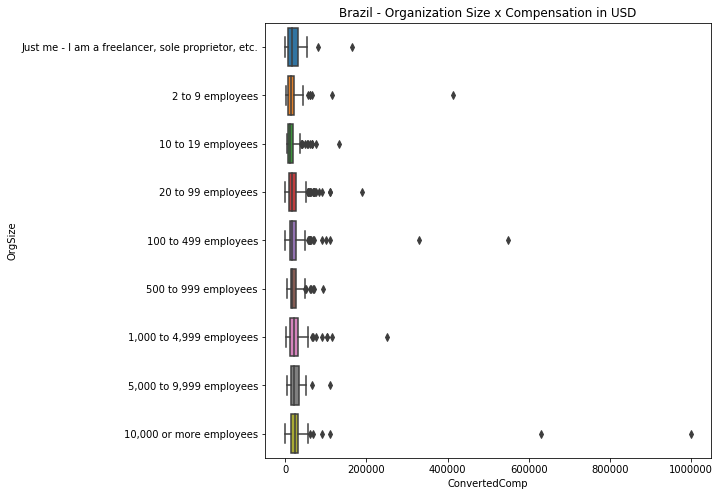

In [45]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="ConvertedComp", y="OrgSize", order=[
    'Just me - I am a freelancer, sole proprietor, etc.','2 to 9 employees','10 to 19 employees',
    '20 to 99 employees','100 to 499 employees','500 to 999 employees','1,000 to 4,999 employees',
    '5,000 to 9,999 employees','10,000 or more employees'], data=q2[q2.Country == 'United States'])
plt.title('United States - Organization Size x Compensation in USD')

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="ConvertedComp", y="OrgSize", order=[
    'Just me - I am a freelancer, sole proprietor, etc.','2 to 9 employees','10 to 19 employees',
    '20 to 99 employees','100 to 499 employees','500 to 999 employees','1,000 to 4,999 employees',
    '5,000 to 9,999 employees','10,000 or more employees'], data=q2[q2.Country == 'India'])
plt.title('India - Organization Size x Compensation in USD')

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="ConvertedComp", y="OrgSize", order=[
    'Just me - I am a freelancer, sole proprietor, etc.','2 to 9 employees','10 to 19 employees',
    '20 to 99 employees','100 to 499 employees','500 to 999 employees','1,000 to 4,999 employees',
    '5,000 to 9,999 employees','10,000 or more employees'], data=q2[q2.Country == 'United Kingdom'])
plt.title('United Kingdom - Organization Size x Compensation in USD')

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="ConvertedComp", y="OrgSize", order=[
    'Just me - I am a freelancer, sole proprietor, etc.','2 to 9 employees','10 to 19 employees',
    '20 to 99 employees','100 to 499 employees','500 to 999 employees','1,000 to 4,999 employees',
    '5,000 to 9,999 employees','10,000 or more employees'], data=q2[q2.Country == 'Germany'])
plt.title('Germany - Organization Size x Compensation in USD')

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="ConvertedComp", y="OrgSize", order=[
    'Just me - I am a freelancer, sole proprietor, etc.','2 to 9 employees','10 to 19 employees',
    '20 to 99 employees','100 to 499 employees','500 to 999 employees','1,000 to 4,999 employees',
    '5,000 to 9,999 employees','10,000 or more employees'], data=q2[q2.Country == 'Brazil'])
plt.title('Brazil - Organization Size x Compensation in USD')


As we can see, the trend continues on each country analyzed. Trending higher compensations on larger organizations, but different, higher median/higher interquartile range for sole proprietor/freelancer.

In [46]:
data.JobSat.unique()

array(['Slightly satisfied', 'Very dissatisfied', nan,
       'Slightly dissatisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied'], dtype=object)

# 3. Question B: "Job satisfaction equals bigger salary?"

Having learned from the previous question's analysis that Country makes a huge difference on Compensation. I will divide each ConvertedComp value by the median of each Country's compensation as a way to account for this, as a high salary in India or Brazil is a low salary in the US, UK, Germany, when converted, although life cost is dramatically lower.

Once again we first will evaluate the percentage of null values.

In [66]:
(data[['JobSat','ConvertedComp','Country']].isna().sum()/data.shape[0]).to_frame().style.bar()

,0
JobSat,0.298894
ConvertedComp,0.460821
Country,0.006035


In [67]:
remaining_data = 100*(data.shape[0] - data[['JobSat','ConvertedComp','Country']].dropna().shape[0])/data.shape[0]
print('The percentage of non missing values in these 3 columns is {:.1f} percent.'.format(remaining_data))

The percentage of non missing values in these 3 columns is 46.2 percent.


Since we still have 46.2% of the data, similarly to the previous question, I opted to drop the null values.

In [80]:
q3 = data[['JobSat','ConvertedComp','Country']].dropna()


In [70]:
q3.head(10)

,JobSat,ConvertedComp,Country
7,Slightly dissatisfied,116000.0,United States
9,Very satisfied,32315.0,United Kingdom
10,Slightly dissatisfied,40070.0,United Kingdom
11,Very dissatisfied,14268.0,Spain
12,Very satisfied,38916.0,Netherlands
13,Slightly satisfied,66000.0,United States
15,Very satisfied,108576.0,United Kingdom
16,Slightly dissatisfied,79000.0,United States
17,Very satisfied,1260000.0,United States
18,Slightly dissatisfied,83400.0,United States


Now, I will create a DataFrame with the converted average and median compensation per country.

In [72]:
compensation_mean_per_country = q3.groupby('Country')['ConvertedComp'].mean().to_frame()
compensation_mean_per_country

,ConvertedComp
Country,
Afghanistan,148290.125000
Albania,25611.000000
Algeria,10362.812500
Andorra,88640.000000
Angola,5292.000000
...,...
"Venezuela, Bolivarian Republic of...",6280.611111
Viet Nam,28342.605769
Yemen,36000.000000


In [73]:
compensation_median_per_country = q3.groupby('Country')['ConvertedComp'].median().to_frame()
compensation_median_per_country

,ConvertedComp
Country,
Afghanistan,15163.5
Albania,15900.0
Algeria,9432.0
Andorra,88640.0
Angola,5292.0
...,...
"Venezuela, Bolivarian Republic of...",3600.0
Viet Nam,10344.0
Yemen,36000.0


It is general knowledge that the median is more robust to outliers, and as we can see in the data above, the median is sometimes half or a third of the mean. So, I decided to create a weighted compensation, where I divide the compensation by the country's median.

To add this value in a column of the dataframe, I created the function below.

In [83]:

def get_country_median(country):
    #function created to get the median of Converted Compensation of the respective row's 'Country' value.
    #this will be used to create a column of Median value by Country.
    return q3.groupby('Country')['ConvertedComp'].median().to_frame().loc[country].values


q3['Median'] = get_country_median(q3.Country)

In [84]:
q3['Weighted_Comp'] = q3['ConvertedComp']/q3['Median']

In [77]:
q3.JobSat.unique()

array(['Slightly dissatisfied', 'Very satisfied', 'Very dissatisfied',
       'Slightly satisfied', 'Neither satisfied nor dissatisfied'],
      dtype=object)

Text(0.5, 1.0, 'Job Satisfaction x Compensation in USD')

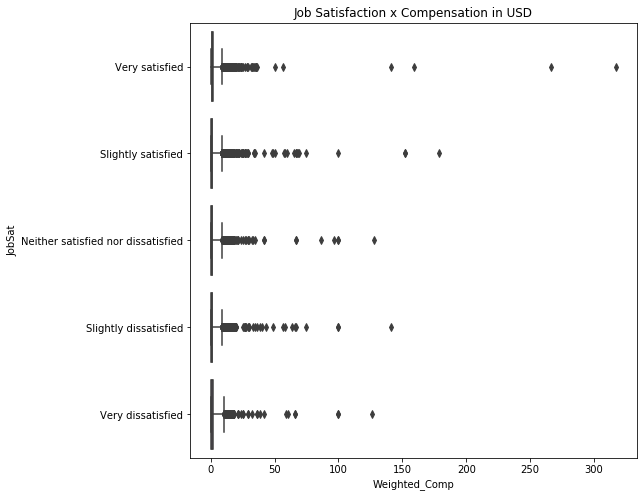

In [78]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="Weighted_Comp", y="JobSat", order=['Very satisfied', 'Slightly satisfied',
        'Neither satisfied nor dissatisfied','Slightly dissatisfied',  'Very dissatisfied'
        ], whis=10, data=q3)
plt.title('Job Satisfaction x Compensation in USD')

Since the number of outliers (values above 1.5 * interquartile range) is significant, it worsens the visualization power of boxplots. To solve it, I will disable the outliers in the next graph.

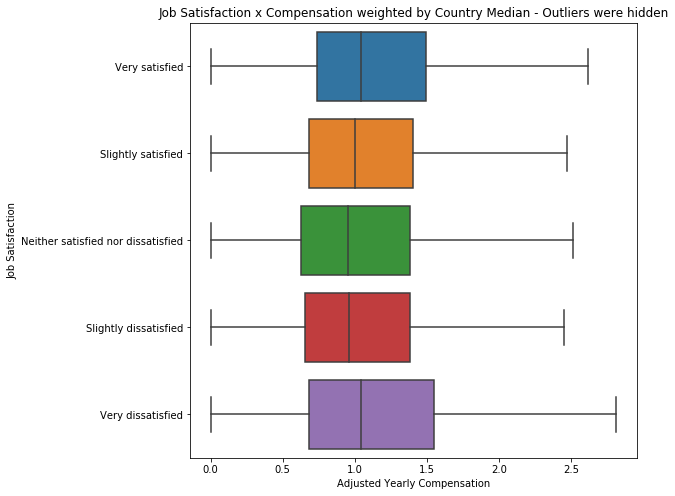

In [85]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="Weighted_Comp", y="JobSat", order=['Very satisfied', 'Slightly satisfied',
        'Neither satisfied nor dissatisfied','Slightly dissatisfied',  'Very dissatisfied'
        ], whis=1.5, data=q3,showfliers = False)
plt.title('Job Satisfaction x Compensation weighted by Country Median - Outliers were hidden')
plt.ylabel('Job Satisfaction')
plt.xlabel('Adjusted Yearly Compensation')
plt.savefig('test.png', dpi = 500)

Interestingly enough, it seems like Job Satisfaction does not have an effect on compensation. 

## 4. Question C: "What is the influence Job satisfaction and Job seeking factors into Job seeking status?"

Given that Job Satisfaction does not seem to matter in terms of compensation, let's experiment, in each of the Job Satisfaction Categories, the distribuition of factors to find a new job and if a dissatisfied person is really looking for jobs more often than other categories.

First, let's evaluate the prevalance of null values.

In [87]:
(data[['JobFactors',
'JobSat',
'JobSeek']].isna().sum()/data.shape[0]).to_frame().style.bar()

,0
JobFactors,0.234436
JobSat,0.298894
JobSeek,0.197546


In [88]:
remaining_data = 100*(data.shape[0] - data[['JobFactors',
'JobSat',
'JobSeek']].dropna().shape[0])/data.shape[0]
print('The percentage of non missing values in these 3 columns is {:.1f} percent.'.format(remaining_data))

The percentage of non missing values in these 3 columns is 36.7 percent.


As we can see, 36.7 percent of the entire dataset will be lost. This is lower than what was used in the last two questions.

In [90]:
q4 = data[['JobFactors',
'JobSat',
'JobSeek'
]].dropna()


Since the Job Factors variable is a list of strings separated by semicolons, we can create dummy variables to be able to count the entries of each factor.

In [91]:
q4['JobFactors'].head()

0    Languages, frameworks, and other technologies ...
3    Flex time or a flexible schedule;Office enviro...
5    Diversity of the company or organization;Langu...
7    Remote work options;Opportunities for professi...
8    Diversity of the company or organization;Remot...
Name: JobFactors, dtype: object

In [93]:
q4 = pd.concat([q4.drop('JobFactors', 1),q4['JobFactors'].str.get_dummies(sep=';')],1)



Below we can see the different categories of 'JobFactors' as dummy variables.

In [94]:
q4.head()

,JobSat,JobSeek,Diversity of the company or organization,Family friendliness,Financial performance or funding status of the company or organization,Flex time or a flexible schedule,How widely used or impactful my work output would be,Industry that I’d be working in,"Languages, frameworks, and other technologies I’d be working with",Office environment or company culture,Opportunities for professional development,Remote work options,Specific department or team I’d be working on
0,Slightly satisfied,I am not interested in new job opportunities,0,0,0,0,0,0,1,0,1,1,0
3,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",0,0,0,1,0,0,0,1,1,0,0
5,Slightly satisfied,I am not interested in new job opportunities,1,0,0,0,0,0,1,1,0,0,0
7,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",0,1,0,0,0,0,0,0,1,1,0
8,Very dissatisfied,"I’m not actively looking, but I am open to new...",1,0,0,0,0,0,0,1,0,1,0


Now that we created dummy variables, let's take a look at the other variables. Job Satisfaction is a categorical, "likert-style". 
Let's create a visualization of Job seek status and Job satisfaction

In [58]:
q4.JobSat.unique()

array(['Slightly satisfied', 'Slightly dissatisfied', 'Very dissatisfied',
       'Very satisfied', 'Neither satisfied nor dissatisfied'],
      dtype=object)

JobSeek                             I am actively looking for a job  \
JobSat                                                                
Neither satisfied nor dissatisfied                         0.024857   
Slightly dissatisfied                                      0.042293   
Slightly satisfied                                         0.029142   
Very dissatisfied                                          0.026424   
Very satisfied                                             0.012906   

JobSeek                             I am not interested in new job opportunities  \
JobSat                                                                             
Neither satisfied nor dissatisfied                                      0.011583   
Slightly dissatisfied                                                   0.011632   
Slightly satisfied                                                      0.060024   
Very dissatisfied                                                       0.019885  

Text(0.5, 0, 'Job Satisfaction')

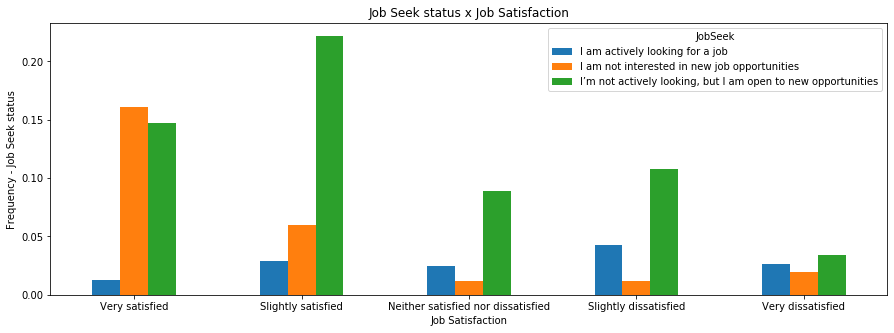

In [86]:
CrosstabResult=pd.crosstab(index=q4['JobSat'],columns=q4['JobSeek'],normalize='all')
print(CrosstabResult)
CrosstabResult = CrosstabResult.loc[['Very satisfied', 'Slightly satisfied',
        'Neither satisfied nor dissatisfied','Slightly dissatisfied',  'Very dissatisfied'
        ]] 

CrosstabResult.plot.bar(figsize=(15,5), rot=0)

plt.title('Job Seek status x Job Satisfaction')
plt.ylabel('Frequency - Job Seek status')
plt.xlabel('Job Satisfaction')

Here we can see that amongst those who responded the JobSeek status and JobSatisfaction questions, most are very satisfied or slightly satisfied with their jobs. 
Those who are very satisfied tend not to be interested on new opportunities, which is expected, but when we compare the neither satisfied nor dissatisfied, slightly dissatisfied and very dissatisfied, we notice that the profile is very similar between them, with a surprisingly higher percentage of "not interested in new job opportunities" in the very dissatisfied category. 

Now, let's see how the factors (each respondent picks 3 out of 11) 


In [60]:
jobfactors_jobsatisfaction = q4.groupby('JobSat')[['Diversity of the company or organization',
       'Family friendliness',
       'Financial performance or funding status of the company or organization',
       'Flex time or a flexible schedule',
       'How widely used or impactful my work output would be',
       'Industry that I’d be working in',
       'Languages, frameworks, and other technologies I’d be working with',
       'Office environment or company culture',
       'Opportunities for professional development', 'Remote work options',
       'Specific department or team I’d be working on']].sum()
jobfactors_jobsatisfaction = jobfactors_jobsatisfaction.loc[['Very satisfied', 'Slightly satisfied',
        'Neither satisfied nor dissatisfied','Slightly dissatisfied',  'Very dissatisfied'
        ]] 
jobfactors_jobsatisfaction

,Diversity of the company or organization,Family friendliness,Financial performance or funding status of the company or organization,Flex time or a flexible schedule,How widely used or impactful my work output would be,Industry that I’d be working in,"Languages, frameworks, and other technologies I’d be working with",Office environment or company culture,Opportunities for professional development,Remote work options,Specific department or team I’d be working on
JobSat,,,,,,,,,,,
Very satisfied,878,1690,1405,5904,2878,1894,6596,6406,5049,4357,1608
Slightly satisfied,811,1524,1495,5850,2498,1936,6770,5677,5186,4321,1454
Neither satisfied nor dissatisfied,339,611,742,2336,927,710,2683,2123,2149,1904,514
Slightly dissatisfied,438,708,782,2903,1376,883,3545,2871,2856,2415,722
Very dissatisfied,229,428,416,1393,624,440,1694,1451,1361,1187,367


now, let's divide the values of each Job Satisfaction category by the category's total.

In [61]:
jobfactors_jobsatisfaction.div(jobfactors_jobsatisfaction.sum(axis=1), axis=0)

,Diversity of the company or organization,Family friendliness,Financial performance or funding status of the company or organization,Flex time or a flexible schedule,How widely used or impactful my work output would be,Industry that I’d be working in,"Languages, frameworks, and other technologies I’d be working with",Office environment or company culture,Opportunities for professional development,Remote work options,Specific department or team I’d be working on
JobSat,,,,,,,,,,,
Very satisfied,0.022708,0.043709,0.036338,0.152696,0.074434,0.048985,0.170594,0.165680,0.130583,0.112686,0.041588
Slightly satisfied,0.021614,0.040616,0.039843,0.155909,0.066574,0.051596,0.180427,0.151298,0.138212,0.115159,0.038751
Neither satisfied nor dissatisfied,0.022543,0.040630,0.049342,0.155340,0.061644,0.047214,0.178415,0.141176,0.142905,0.126613,0.034180
Slightly dissatisfied,0.022463,0.036310,0.040105,0.148879,0.070568,0.045284,0.181804,0.147238,0.146469,0.123853,0.037028
Very dissatisfied,0.023879,0.044630,0.043379,0.145255,0.065068,0.045881,0.176642,0.151303,0.141919,0.123775,0.038269


As we can see in the table, the factors elected by each category in Job Satisfaction are very consistent between categories, with nearly the same percentage. We can conclude that the top criteria is 
- Languages, frameworks, and other technologies I’d be working with

The second and third and fourth, very close and sometimes swapping inside the categories, is:

- Office environment or company culture	
- Flex time or a flexible schedule
- Opportunities for professional development	

In [62]:
q4.JobSeek.unique()

array(['I am not interested in new job opportunities',
       'I’m not actively looking, but I am open to new opportunities',
       'I am actively looking for a job'], dtype=object)

In [63]:
jobfactors_jobseek = q4.groupby('JobSeek')[['Diversity of the company or organization',
       'Family friendliness',
       'Financial performance or funding status of the company or organization',
       'Flex time or a flexible schedule',
       'How widely used or impactful my work output would be',
       'Industry that I’d be working in',
       'Languages, frameworks, and other technologies I’d be working with',
       'Office environment or company culture',
       'Opportunities for professional development', 'Remote work options',
       'Specific department or team I’d be working on']].sum()
jobfactors_jobseek = jobfactors_jobseek.loc[['I am not interested in new job opportunities',
       'I’m not actively looking, but I am open to new opportunities',
       'I am actively looking for a job']] 
jobfactors_jobseek

,Diversity of the company or organization,Family friendliness,Financial performance or funding status of the company or organization,Flex time or a flexible schedule,How widely used or impactful my work output would be,Industry that I’d be working in,"Languages, frameworks, and other technologies I’d be working with",Office environment or company culture,Opportunities for professional development,Remote work options,Specific department or team I’d be working on
JobSeek,,,,,,,,,,,
I am not interested in new job opportunities,757,1465,1125,4857,2318,1605,5555,5491,3912,3262,1439
"I’m not actively looking, but I am open to new opportunities",1512,2909,2910,11361,4918,3512,12885,10650,10103,8978,2708
I am actively looking for a job,426,587,805,2168,1067,746,2848,2387,2586,1944,518


Let's convert this like the last one, into relative frequencies for each JobSeek category.

In [64]:
jobfactors_jobseek = jobfactors_jobseek.div(jobfactors_jobseek.sum(axis=1), axis=0)
jobfactors_jobseek

,Diversity of the company or organization,Family friendliness,Financial performance or funding status of the company or organization,Flex time or a flexible schedule,How widely used or impactful my work output would be,Industry that I’d be working in,"Languages, frameworks, and other technologies I’d be working with",Office environment or company culture,Opportunities for professional development,Remote work options,Specific department or team I’d be working on
JobSeek,,,,,,,,,,,
I am not interested in new job opportunities,0.023816,0.046089,0.035393,0.152803,0.072925,0.050494,0.174762,0.172749,0.123073,0.102624,0.045272
"I’m not actively looking, but I am open to new opportunities",0.020871,0.040154,0.040168,0.156820,0.067885,0.048477,0.177857,0.147006,0.139456,0.123927,0.037380
I am actively looking for a job,0.026489,0.036500,0.050056,0.134809,0.066347,0.046387,0.177092,0.148427,0.160801,0.120880,0.032210


When looking at the table, we can see that the main factor is:

- Languages, frameworks, and other technologies I’d be working with

However, when looking at the other factors, the scenario changes between Job Seek Status. Office environment or company culture is higher ranked amongst those who are not interested in new job opportunities. It is likely that they enjoy the environment that they currently have.
Interestingly, the rank for "opportunities for professional development" increases from the "not interested", to "open" and then to "actively seeking", overtaking office environment in the later. This is an indication of the perception of those willing or open to jump to a new opportunity may feel their professional development is more difficult.

Other observations: Remote work options are ranked lower for those not open to new opportunities in comparison to the other status. This can mean they already have it or it may be a reason for employees that are willing or opento change jobs.

Text(0.5, 1.0, 'Some of the main factors for Job selection and Job Seek Status')

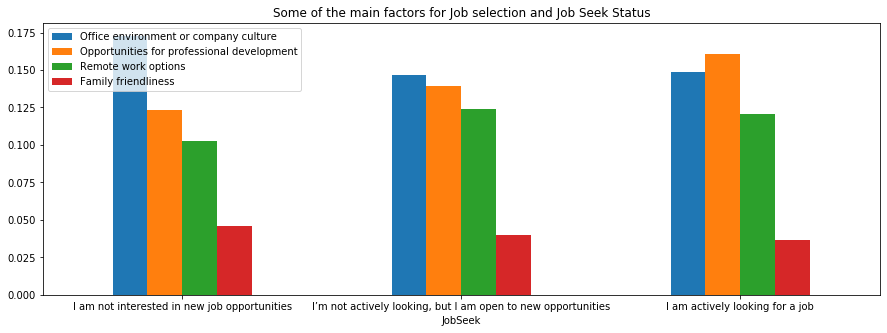

In [65]:
jobfactors_jobseek[['Office environment or company culture','Opportunities for professional development',
                   'Remote work options','Family friendliness']].plot.bar(figsize=(15,5), rot=0)
plt.title('Some of the main factors for Job selection and Job Seek Status')

## 5.Conclusions

After carefully looking into the proposed questions:

- A: "Do employees of smaller companies earn overall less than those working for bigger companies?"
- B: "Job satisfaction equals bigger salary?"
- C: "What is the influence Job satisfaction and Job seeking factors into Job seeking status?"

We can see that:

- Overall bigger companies pay bigger salaries, but individual, autonomous, have a bigger spread and a median compensation that is similar to that of a big company.
- Job satisfaction does not equals to bigger salary, as we could see that dissatisfied and satisfied employees had very similar compensation.
- Very Satisfied employees are less likely to be open or actively looking for jobs, however, other categories show more openess and will to change. Surprisingly, a bigger chunk of very unsatisfied people is not looking or open to a new job in comparisson to "less unsatisfied" groups. This means that, in general, this is not a decising factor, specially to be open to new jobs.
- Languages, frameworks and technologies are the most important factor for new Job selection for all Job seeking status. However, other factors show some dependence, as the opportunities for professional development become more important those open and actively looking for jobs. Factors like environment, culture and family friendliness tend to be more important for those not actively looking for jobs. This can be either cause or effect for lack of interest in job seeking, but is noticeable.